In [412]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

### Read disease/phenotype data

In [413]:
corpus_df = pd.read_table('phenotype.hpoa', skiprows=4)

/Users/bmoore/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Do something clever here with qualifier (NOT), Evidence (IEA), Onset (congenital, adult etc) and Frequency (4/10)

In [414]:
corpus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253363 entries, 0 to 253362
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   #DatabaseID  253363 non-null  object
 1   DiseaseName  253363 non-null  object
 2   Qualifier    1430 non-null    object
 3   HPO_ID       253363 non-null  object
 4   Reference    253363 non-null  object
 5   Evidence     253363 non-null  object
 6   Onset        2835 non-null    object
 7   Frequency    176862 non-null  object
 8   Sex          587 non-null     object
 9   Modifier     1044 non-null    object
 10  Aspect       253363 non-null  object
 11  Biocuration  253363 non-null  object
dtypes: object(12)
memory usage: 23.2+ MB


In [415]:
corpus_df.rename(columns={'#DatabaseID': 'label', 'HPO_ID': 'hpo'}, inplace=True)
corpus_df

,label,DiseaseName,Qualifier,hpo,Reference,Evidence,Onset,Frequency,Sex,Modifier,Aspect,Biocuration
0,OMIM:203400,Corticosterone methyloxidase type I deficiency,NaN,HP:0002013,OMIM:203400,IEA,NaN,NaN,NaN,NaN,P,HPO:iea[2009-02-17]
1,OMIM:203400,Corticosterone methyloxidase type I deficiency,NaN,HP:0002153,OMIM:203400,IEA,NaN,NaN,NaN,NaN,P,HPO:iea[2009-02-17]
2,OMIM:203400,Corticosterone methyloxidase type I deficiency,NaN,HP:0000848,OMIM:203400,IEA,NaN,NaN,NaN,NaN,P,HPO:iea[2009-02-17]
3,OMIM:203400,Corticosterone methyloxidase type I deficiency,NaN,HP:0001508,OMIM:203400,IEA,NaN,NaN,NaN,NaN,P,HPO:iea[2009-02-17]
4,OMIM:203400,Corticosterone methyloxidase type I deficiency,NaN,HP:0001944,OMIM:203400,IEA,NaN,NaN,NaN,NaN,P,HPO:iea[2009-02-17]
...,...,...,...,...,...,...,...,...,...,...,...,...
253358,ORPHA:1777,Temtamy syndrome,NaN,HP:0001831,ORPHA:1777,TAS,NaN,HP:0040281,NaN,NaN,P,ORPHA:orphadata[2023-01-27]
253359,ORPHA:1777,Temtamy syndrome,NaN,HP:0002970,ORPHA:1777,TAS,NaN,HP:0040282,NaN,NaN,P,ORPHA:orphadata[2023-01-27]
253360,ORPHA:1777,Temtamy syndrome,NaN,HP:0004209,ORPHA:1777,TAS,NaN,HP:0040283,NaN,NaN,P,ORPHA:orphadata[2023-01-27]
253361,ORPHA:1777,Temtamy syndrome,NaN,HP:0005692,ORPHA:1777,TAS,NaN,HP:0040283,NaN,NaN,P,ORPHA:orphadata[2023-01-27]


In [416]:
corpus_df = corpus_df[['label', 'hpo']]

In [417]:
corpus_df

,label,hpo
0,OMIM:203400,HP:0002013
1,OMIM:203400,HP:0002153
2,OMIM:203400,HP:0000848
3,OMIM:203400,HP:0001508
4,OMIM:203400,HP:0001944
...,...,...
253358,ORPHA:1777,HP:0001831
253359,ORPHA:1777,HP:0002970
253360,ORPHA:1777,HP:0004209
253361,ORPHA:1777,HP:0005692


In [419]:
corpus_dict = corpus_df.to_dict(orient='record')

In [423]:
vec = DictVectorizer(sparse=False)
corpus_vec= vec.fit_transform(corpus_dict)
corpus_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [424]:
vectorizer = TfidfVectorizer()
corpus_tfidf = vectorizer.fit_transform(corpus_vec)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [327]:
corpus = df['hpo']

### Create TFIDF disease vectors

In [328]:
vectorizer = TfidfVectorizer()
hpo_vec = vectorizer.fit_transform(corpus)

### Create TFIDF query vector

In [329]:
query = (
    'HP_0012531,HP_0001263,HP_0000152,HP_0000234,HP_0000707,HP_0001250,HP_0001298,HP_0002011,HP_0002384,HP_0012443,HP_0001649,HP_0002349,HP_0007359,HP_0004372,HP_0001254,HP_0002329,HP_0004897,HP_0011024,HP_0025031,HP_0002060,HP_0003011,HP_0003198,HP_0003458,HP_0004303,HP_0012759,HP_0040290,HP_0200134,HP_0000708,HP_0000818,HP_0001438,HP_0001742,HP_0001943,HP_0003202,HP_0011013,HP_0000765,HP_0001626,HP_0001627,HP_0001697,HP_0002910,HP_0012393,HP_0045026,HP_0000153,HP_0000163,HP_0000486,HP_0000737,HP_0001270,HP_0001633,HP_0001653,HP_0001654,HP_0001698,HP_0001941,HP_0002242,HP_0002576,HP_0002814,HP_0003128,HP_0004796,HP_0005214,HP_0006705,HP_0010676,HP_0010877,HP_0040066,HP_0003111,HP_0012378,HP_0000577,HP_0001549,HP_0001637,HP_0001942,HP_0002086,HP_0002244,HP_0011703,HP_0012735,HP_0000565,HP_0000716,HP_0000739,HP_0000750,HP_0000958,HP_0001251,HP_0001252,HP_0001289,HP_0001290,HP_0001392,HP_0001635,HP_0001638,HP_0001946,HP_0001974,HP_0002087,HP_0002104,HP_0002133,HP_0002474,HP_0002480,HP_0002684,HP_0002715,HP_0002813,HP_0003201,HP_0003558,HP_0008119,HP_0009900,HP_0011105,HP_0011343,HP_0011439,HP_0011663,HP_0012103,HP_0012639,HP_0012847,HP_0000019,HP_0000194,HP_0000271,HP_0000315,HP_0000366,HP_0000478,HP_0000490,HP_0000504,HP_0000520,HP_0000593,HP_0000646,HP_0000819,HP_0000995,HP_0001276,HP_0001367,HP_0001623,HP_0001701,HP_0002013,HP_0002015,HP_0002067,HP_0002079,HP_0002098,HP_0002353,HP_0002375,HP_0002487,HP_0002509,HP_0002789,HP_0002883,HP_0003040,HP_0003270,HP_0003698,HP_0003764,HP_0004328,HP_0005335,HP_0005957,HP_0005978,HP_0006872,HP_0006895,HP_0007239,HP_0010808,HP_0011885,HP_0011886,HP_0011947,HP_0012819,HP_0025085,HP_0025406,HP_0030048,HP_0031417,HP_0100649,HP_0100962,HP_0200055,HP_0200136'
)
re.sub(query, ':', '_')
dis_name = 'Metabolic encephalomyopathic crises, recurrent, with rhabdomyolysis, cardiac arrhythmias, and neurodegeneration'
query_vec = vectorizer.transform([query])

In [330]:
query_vec

<1x10560 sparse matrix of type '<class 'numpy.float64'>'
	with 152 stored elements in Compressed Sparse Row format>

In [331]:
cos_sim = cosine_similarity(hpo_vec, query_vec)

In [332]:
cos_sim.shape

(12606, 1)

In [333]:
cs_df = pd.DataFrame(cos_sim, index=df['name'], columns=['similarity'])
cs_df.index.rename('disease', inplace=True)

In [334]:
cs_df.sort_values(by='similarity', ascending=False, inplace=True)

In [335]:
cs_df.loc[dis_name]

similarity    0.074243
Name: Metabolic encephalomyopathic crises, recurrent, with rhabdomyolysis, cardiac arrhythmias, and neurodegeneration, dtype: float64

In [336]:
cs_dfx = cs_df.reset_index()
cs_dfx.index[cs_dfx['disease'] == dis_name].values.tolist()

[203]

In [337]:
cs_df.iloc[0:15,:]

,similarity
disease,
"Fructose-1,6-Bisphosphatase deficiency",0.166869
Holocarboxylase synthetase deficiency,0.137045
ALG3-CDG,0.130856
Cholera,0.129257
"Fructose-1,6-bisphosphatase deficiency",0.123554
Acquired methemoglobinemia,0.120812
Autosomal dominant progressive external ophthalmoplegia,0.119005
Cardiomyopathy-hypotonia-lactic acidosis syndrome,0.118739
Exercise-induced malignant hyperthermia,0.118291


<AxesSubplot:xlabel='similarity', ylabel='disease'>

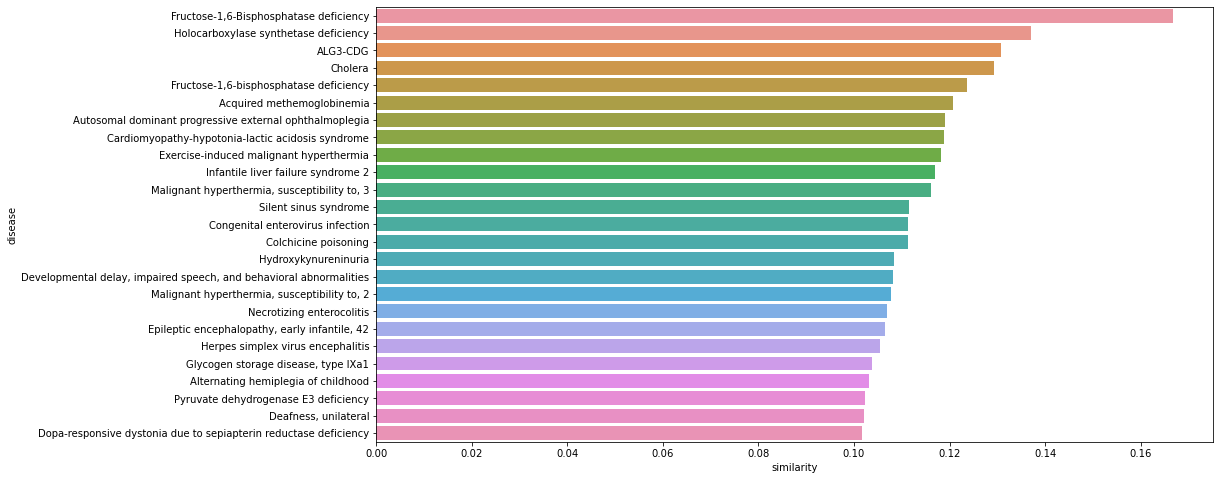

In [338]:
plt.figure(figsize=(15,8))
sns.barplot(data=cs_df.iloc[0:25,:].reset_index(), x='similarity', y='disease')


<AxesSubplot:ylabel='Density'>

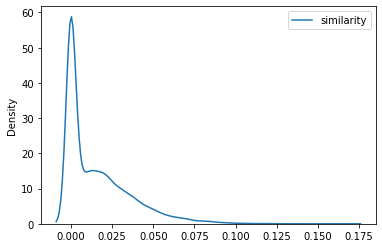

In [339]:
sns.kdeplot(data=cs_df)

In [340]:
# cs_df

In [341]:
# cs_df = cs_df.stack().reset_index()
# cs_df.columns = ['Row','Column','Value']

In [342]:
# cs_df = cs_df[cs_df['Value'] > 0]

In [343]:
# cs_df = cs_df.sort_values(ascending=False, by='Value')

In [344]:
# cs_df.sample(10000).sort_values(ascending=False, by='Value')

In [345]:
# cs_df.tail(100)

corpusX = [
          'This is the first document.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?',
         ]

data = [
    ['ORPHA_262',
     'Duchenne and Becker muscular dystrophy',
     'HP_0001256,HP_0001288,HP_0001387,HP_0001639,HP_0002376,HP_0002650,HP_0003100,HP_0003198,HP_0003202,HP_0003236,HP_0003307,HP_0003457,HP_0004349'
    ],
    ['OMIM_616339', 
     'Epileptic encephalopathy, early infantile, 29',
     'HP_0008936,HP_0002059,HP_0003577,HP_0000252,HP_0004322,HP_0002310,HP_0002451,HP_0001263,HP_0001284,HP_0003593,HP_0002072,HP_0032794,HP_0000639,HP_0001508,HP_0001838,HP_0002827,HP_0009830,HP_0000007,HP_0200134,HP_0003429,HP_0001511,HP_0001257,HP_0000643'
    ],
    ['OMIM_232240',
     'Glycogen storage disease Ic',
     'HP_0002884,HP_0003077,HP_0000083,HP_0002240,HP_0410175,HP_0012522,HP_0001943,HP_0001946,HP_0001942,HP_0001402,HP_0003128,HP_0003623,HP_0002037,HP_0000991,HP_0000097,HP_0000790,HP_0000093,HP_0002092,HP_0012213,HP_0006280,HP_0040289,HP_0010280,HP_0000822,HP_0000007,HP_0000823,HP_0002788,HP_0001114,HP_0001997,HP_0002149'
    ],
    ['OMIM_617751',
     'Intellectual developmental disorder, autosomal dominant 48',
     'HP_0001250,HP_0001252,HP_0003593,HP_0011463,HP_0011461,HP_0001647,HP_0000637,HP_0001643,HP_0000752,HP_0001249,HP_0003623,HP_0002553,HP_0000252,HP_0001344,HP_0001388,HP_0002079,HP_0002198,HP_0002195,HP_0000407,HP_0007033,HP_0000729,HP_0001537,HP_0000964,HP_0000403,HP_0000047,HP_0000006,HP_0000369,HP_0002786,HP_0000463,HP_0002365,HP_0002360,HP_0002280,HP_0010942,HP_0001629,HP_0008872,HP_0000733,HP_0009765,HP_0006532,HP_0000256,HP_0001320,HP_0006956,HP_0002650,HP_0001321,HP_0000194,HP_0000426,HP_0001357,HP_0000664,HP_0001511,HP_0002126'
    ],
    ['OMIM_617622',
     'Joubert syndrome 30',
     'HP_0003577,HP_0000750,HP_0000496,HP_0020185,HP_0001250,HP_0001162,HP_0001272,HP_0001263,HP_0001252,HP_0002282,HP_0000508,HP_0007663,HP_0002419,HP_0001305,HP_0000007,HP_0002119,HP_0002789,HP_0000556,HP_0001249,HP_0002104'
    ],
    ['OMIM_612291',
     'Joubert syndrome 8',
     'HP_0002883,HP_0001276,HP_0001344,HP_0031936,HP_0002085,HP_0001252,HP_0001263,HP_0000580,HP_0002240,HP_0001251,HP_0001290,HP_0000508,HP_0000657,HP_0002419,HP_0000007,HP_0000543,HP_0006579,HP_0001513,HP_0001249,HP_0003623'
    ],
    ['OMIM_613724',
     'Leukoencephalopathy with dystonia and motor neuropathy',
     'HP_0000473,HP_0000815,HP_0002450,HP_0002352,HP_0000570,HP_0009830,HP_0004409,HP_0000007,HP_0010663,HP_0002080,HP_0002346,HP_0000027'
    ],
    ['OMIM_151623',
     'Li-Fraumeni syndrome',
     'HP_0002894,HP_0002488,HP_0003002,HP_0003003,HP_0030078,HP_0012125,HP_0030448,HP_0100787,HP_0100768,HP_0002669,HP_0002667,HP_0000006,HP_0006744'
    ],
    ['OMIM_619562',
     'Joubert syndrome 39',
     'HP_0001320,HP_0030674,HP_0002085,HP_0001263,HP_0004383,HP_0100259,HP_0040213,HP_0009183,HP_0007021,HP_0000657,HP_0000007,HP_0002419,HP_0025502,HP_0000113,HP_0000556'
    ],
    ['OMIM_601954',
     'Muscular dystrophy, limb-girdle, type 2G',
     'HP_0002355,HP_0003236,HP_0008948,HP_0003551,HP_0003560,HP_0009053,HP_0008981,HP_0009025,HP_0009046,HP_0009027,HP_0008994,HP_0000007,HP_0003805,HP_0008997,HP_0002522,HP_0003557,HP_0008944'
    ],
    ]

In [346]:
# cs_df = cs_df.where(np.triu(np.ones(cs_df.shape), k=1).astype(bool))